<a href="https://colab.research.google.com/github/Mariam-Yahya/Communication-Lab/blob/master/PAM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers the following concepts:
1. The periodic pulse train (square wave) in the time and frequency domains.
2. The three sampling methods: natural sampling, flat-topped sampling, and ideal sampling.
3. The sampling theorem.
4. Time division multiplexing TDM.

# The Periodic Pulse Train in the Time and Frequency Domains

A periodic square function is characterized by its amplitude, frequency $f$, and duty cycle. Let us now generate a square wave function and see how changing the duty cycle affects the signal in the time and frequency domains.

Import necessary libraries

In [0]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

Set the time variables

In [0]:
Tstart=0
Tstop=10
Tstep=1e-5
t = np.arange(Tstart,Tstop,Tstep)

Plot the periodic pulse train (square wave) in the time domain

(0.0, 1.0)

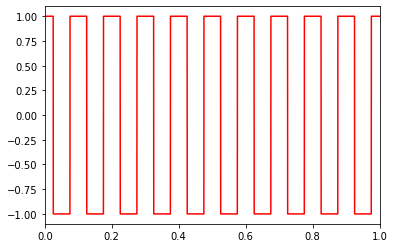

In [0]:
dty=0.5     # duty cycle of the square wave
f=10        # frequency of the square wave

pt=signal.square(2 * np.pi * f * t +np.pi*dty, duty=dty) # pulse train with duty cycle=dty
                                                         # note that the signal is shifted to the left to start at the center of the ON period 

plt.plot(t,pt,'r')
plt.xlim(0,1)

Plot the periodic pulse train (square wave) in the frequency domain

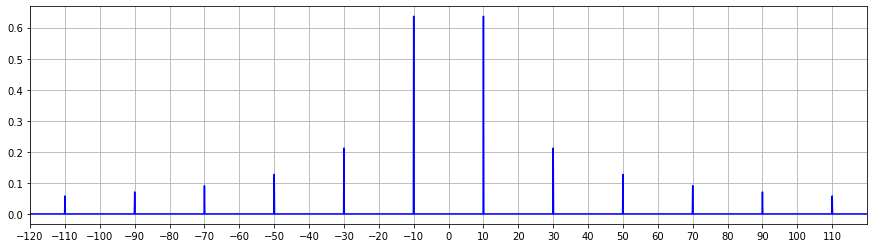

In [0]:
N=len(t)            
PT = np.abs(np.fft.fft(pt))   # pulse train (square wave) in the frequency domain
freqs = np.fft.fftfreq(pt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
PT=PT[idx]/N

lim=120   # x-axis limits
plt.figure(figsize=(15,4))
plt.plot(freqs, PT,'b')
plt.xlim(-lim,lim)
a=list(range(-lim,lim,f))  # to add markers on the figure at integer multiples of f
plt.xticks(a) 
plt.grid()


When the duty cycle is 0.5 the spectral components at $2f$ become zero. $f$ here is 10, and the spectral components at $2 n f =0$, $n$ is an integer.

**Excercise:** Change the duty cycle to $0.2, 0.4$ and $0.7$, look at the signal in the time domain and then find the value of $n$ at which the $n$th harmonic becomes zero. You can extend the limits of the x-axis.

# The Impulse Train in the Time and Frequency Domains

Let us plot an impulse signal with period $T=0.1$.

(-0.1, 1.1)

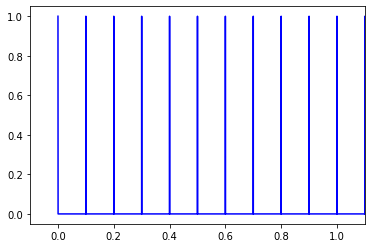

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)   # set the time
L=len(t)    
f=10     # frequency of the impulse train
T= int(1/(f*Tstep))    # period

impls=np.zeros(L)   # impulse signal, impulse=0 for all t except at t=T it equals to 1
for i in  range (0, L,T):
    impls[i]=1

plt.plot(t, impls,'b')
plt.xlim(-.1,1.1)

Let us plot the impulse signal in the frequency domain. Note that there is an impulse at integer multiples of $f=\frac{1}{T} = 10$

(-50.0, 50.0)

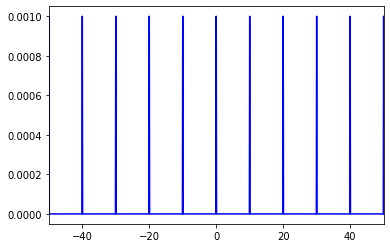

In [0]:
N=len(t)           
IMPLS = np.abs(np.fft.fft(impls))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMPLS=IMPLS[idx]/N
plt.plot(freqs, IMPLS,'b')
plt.xlim(-50,50)

# Ideal Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **ideal sampling method**.  The sampled signal is generated by multiplying the message signal by an impulse train with period $Ts$. The sampling frequency here is $f_s=20Hz$.

(0.0, 1.0)

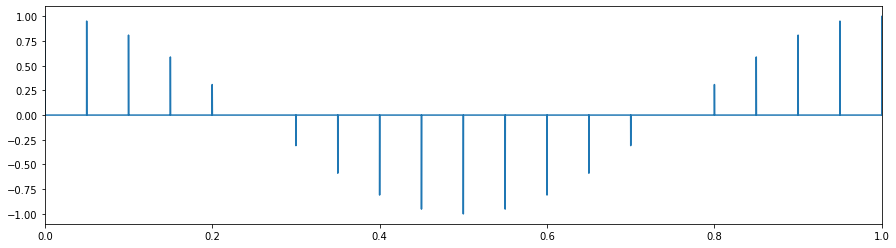

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=20    # frequency of the periodic pulse train 
Ts= int(1/(fs*Tstep))   # sampling time Ts=T/Tstep, here Ts=0.1

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,Ts):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal
plt.figure(figsize=(15,4))
plt.plot(t, mtIdeal)
plt.xlim(0,1)


**Excercise:** Change the sampling frequency $f_s$ to $5, 10$ and $30$ and observe the changes on the sampled signal.

Let us now show how the sampled signal differes from the message signal.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

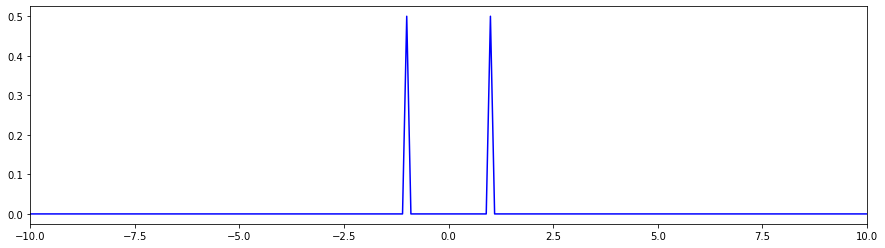

In [0]:
N=len(t)         
MT = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MT,'b')
plt.xlim(-10,10)

Now let us look at the impulse signal in frequency domain

(-50.0, 50.0)

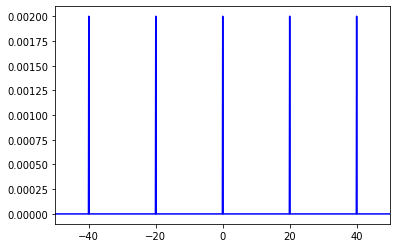

In [0]:
N=len(t)   
IMP= np.abs(np.fft.fft(impls))
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, IMP,'b')
plt.xlim(-50,50)

And finally let us plot the sampled signal in the frequency domain

(-40.0, 40.0)

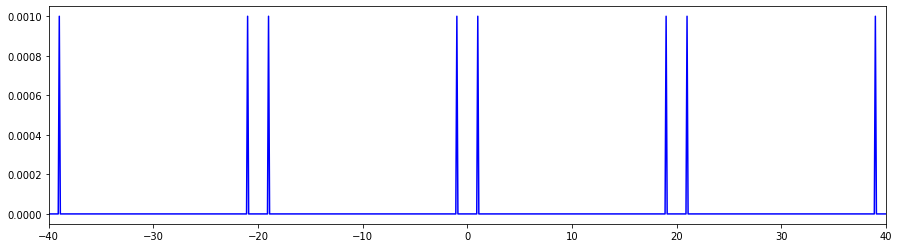

In [0]:
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, SF,'b')
plt.xlim(-40,40)

# Natural Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **natural sampling method**. The sampled signal is generated my multiplying the message signal by a periodic pulse train. The sampling frequency is $f_s=20Hz$

(0.0, 1.0)

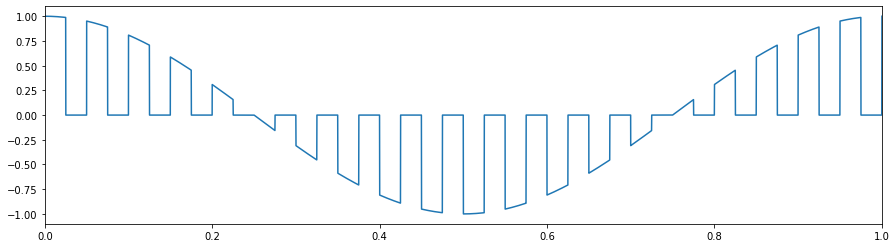

In [183]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
fs=20    # frequency of the periodic pulse train
dty=0.5 # duty cycle
ptrain=0.5*(1+signal.square(2 * np.pi * fs * t, duty=dty))
fm=1
Am=1
mt=Am*np.cos(2 * np.pi * fm* t) # message signal
st=mt*ptrain                    # sampled signal
mtNatural= mt*ptrain    # sampled signal

plt.figure(figsize=(15,4))
plt.plot(t,mtNatural)          
plt.xlim(0,1)

**Excercise:** Change the frequency and the duty cycle of the pulse train (square wave) to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

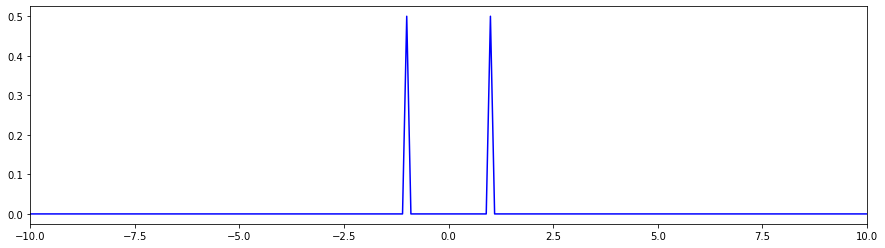

In [184]:
N=len(t)         
MT = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MT,'b')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

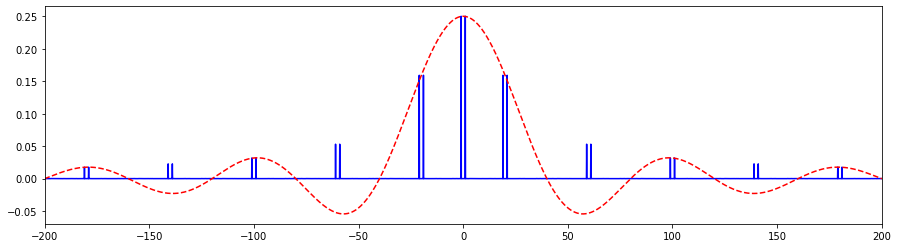

In [185]:
N=len(t)   
MFNatural= np.abs(np.fft.fft(mtNatural))
freqs = np.fft.fftfreq(mtNatural.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]

MFNatural=MFNatural[idx]/N    # Sampled signal in the frequency domain

sincEnvelope=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFNatural,'b', freqs,sincEnvelope,'r--')
plt.xlim(-200,200)

# Flat-Topped Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **flat-topped sampling method**.  The sampled signal is generated using the sample and hold method, which means that the message signal is sampled at time $Ts$, and the value of the signal is held for a fraction of the sampling period that can be controlled using the duty cycle. The sampling frequency here is $f_s=20Hz$.

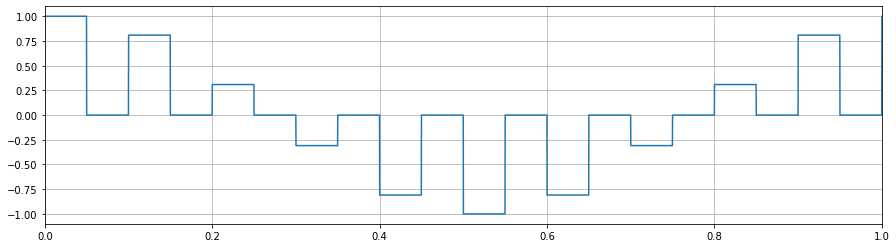

In [175]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=10    # frequency of the periodic pulse train 
dty=0.5 # duty cycle of periodic pulse train
Ts= int(1/(fs*Tstep))   # sampling time Ts=T/Tstep, here Ts=0.1

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

mtFlat=np.zeros(L)
for i in  range (0, L,Ts):
    mtFlat[i:i+int(Ts*dty)-1]=mt[i]   # sampled signal

plt.figure(figsize=(15,4))
plt.xlim(0,1)
plt.plot(t, mtFlat)
plt.grid()

**Excercise:** Change the sampling frequency and the duty cycle to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

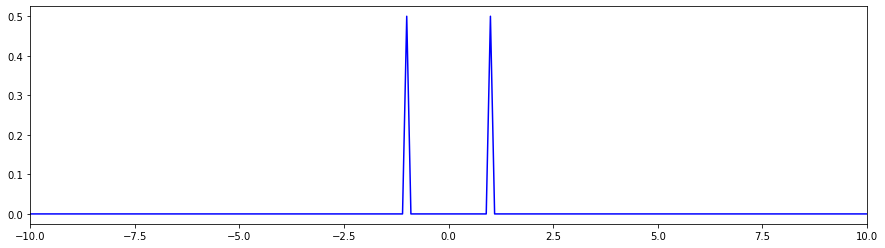

In [176]:
N=len(t)         
MT = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MT,'b')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

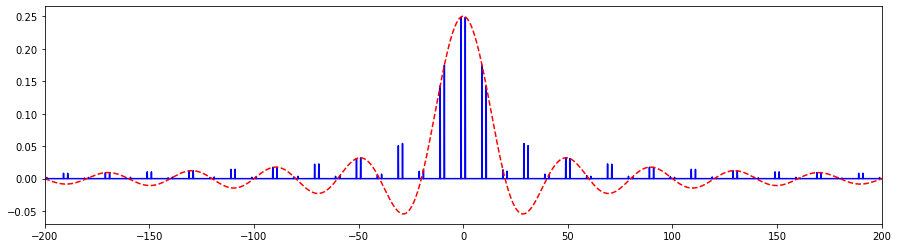

In [178]:
N=len(t)   
MFFlat= np.abs(np.fft.fft(mtFlat))
freqs = np.fft.fftfreq(mtFlat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MFFlat=MFFlat[idx]/N

sincEnvelope=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFFlat,'b',freqs,sincEnvelope,'r--')
plt.xlim(-200,200)

# The sampling Theorem

In this section we will sample a time-limited signal using three different sampling frequencies to see how the sampled signal is affected.
We will start with $f_s> 2W$, then $f_s=2W$, and finally $f_s<2W$ 

**Case 1:** $f_S>2W$

(-50.0, 50.0)

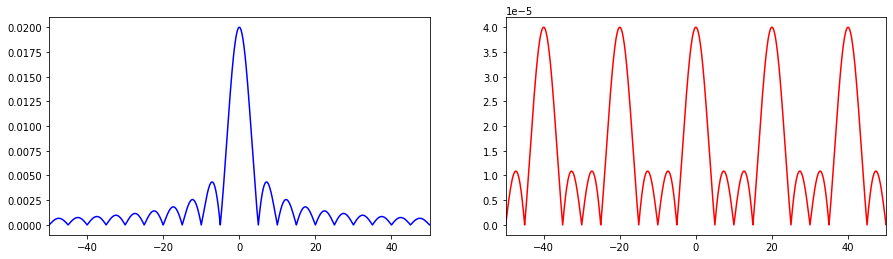

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=20    # frequency of the periodic pulse train 
Ts= int(1/(fs*Tstep))   # sampling time

a=np.ones(int(L/50))
b=np.zeros(L-int(L/50))
mt=np.append(a,b)   # the message signal is a short sequence of ones

impls=np.zeros(L) # impulse train
for i in  range (0, L,Ts):
    impls[i]=1

mtIdeal= impls*mt # sample the message signal

f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MT = np.abs(np.fft.fft(mt))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
ax1.plot(freqs, MT,'b')
ax1.set_xlim(-50,50)

SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-50,50)

**Case 2:** $f_s=2W$

(-50.0, 50.0)

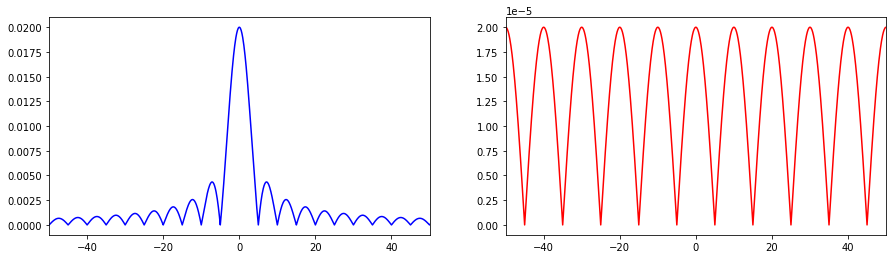

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=10    # frequency of the periodic pulse train 
Ts= int(1/(fs*Tstep))   # sampling time

a=np.ones(int(L/50))    # 
b=np.zeros(L-int(L/50))
mt=np.append(a,b)
impls=np.zeros(L)
for i in  range (0, L,Ts):
    impls[i]=1
mtIdeal= impls*mt

f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MT = np.abs(np.fft.fft(mt))     # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
ax1.plot(freqs, MT,'b')
ax1.set_xlim(-50,50)

SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-50,50)

**Case 2:** $f_s<2W$

(-50.0, 50.0)

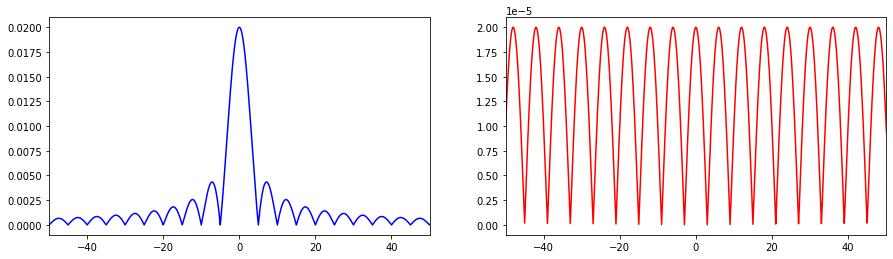

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=6    # frequency of the periodic pulse train 
Ts= int(1/(fs*Tstep))   # sampling time

a=np.ones(int(L/50))
b=np.zeros(L-int(L/50))
mt=np.append(a,b)
impls=np.zeros(L)
for i in  range (0, L,Ts):
    impls[i]=1
mtIdeal= impls*mt

f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MT = np.abs(np.fft.fft(mt))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
ax1.plot(freqs, MT,'b')
ax1.set_xlim(-50,50)

SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-50,50)

**Excercise** Compare the last three results. What do you conclude?

# Time Division Multiplexing

(0.0, 0.5)

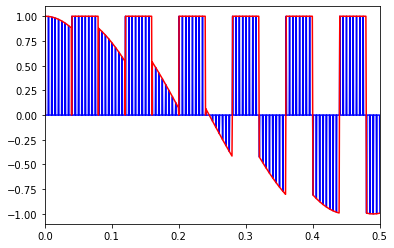

In [0]:
import numpy as np
import matplotlib.pyplot as plt
Tstart=0
Tstop=10
Tstep=1e-3
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
N=2 # data rate of TDM line to the data rate of individual lines (number of multiplexed signals)

fs=100    # frequency of the periodic impulse train
Ts= int(1/(fs*Tstep))   # sampling time 
impls=np.zeros(L)     # impulse train
for i in  range (0, L,Ts):
    impls[i]=1

fm=1    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt1=Am*np.cos(2 * np.pi * fm* t) # the first message signal is sinusoidal

mt2=np.ones(L)    # second message signal is all ones

mtIdeal1= impls*mt1   # sampling the first signal
mtIdeal2=impls*mt2    # sampling the second signal

# TDM
Nsamp=int(8*Ts)    #number of samples taken from each signal mtideal1, mtideal2

tline=np.arange(Tstart,Tstop,Tstep/N) # rate at the output of the TDM is N*rate of the multiplexed lines
TDMline= np.zeros(len(tline))
indx=0
for samp in range (1,L,N*Nsamp):    #multiplexing the two signals
    TDMline[samp:samp+Nsamp-1]=mtIdeal1[indx:indx+Nsamp-1]
    TDMline[samp+Nsamp:samp+2*Nsamp-1]=mtIdeal2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

# the following code plots the TDM of the message signals (unsampled) only to clarify the envelope of the signals
indx=0     
envTDMline= np.zeros(len(tline))
for samp in range (1,L,N*Nsamp):    #multiplexing
    envTDMline[samp:samp+Nsamp-1]=mt1[indx:indx+Nsamp-1]
    envTDMline[samp+Nsamp:samp+2*Nsamp-1]=mt2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

plt.plot(tline, TDMline,'b',tline, envTDMline,'r')
plt.xlim(0,0.5)
